<a href="https://colab.research.google.com/github/Kadaytes/HW_PY/blob/main/DZ_3_VNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U keras-tuner

import tensorflow as tf
tf.random.set_seed(5)
from tensorflow import keras
from tensorflow.keras import callbacks
from tensorflow.keras.utils import to_categorical, to_ordinal
from tensorflow.keras.models import load_model

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, accuracy_score

print(tf.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.1 MB/s eta 0:00:00
2.15.0


4422102/4422102 [==============================] - 0s 0us/step


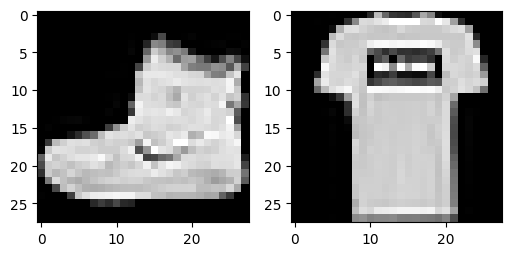

In [2]:
# Import dataset
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize.
train_images = (train_images / 255)
test_images = (test_images / 255)

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(train_images[0], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(train_images[1], cmap='gray')

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Определение слоев.
Cоздадим 3 слоя нейронной сети с помощью функционала Keras.layers

313/313 - 1s - loss: 0.3450 - accuracy: 0.8946 - 682ms/epoch - 2ms/step

Test accuracy: 0.894599974155426
313/313 [==============================] - 1s 2ms/step


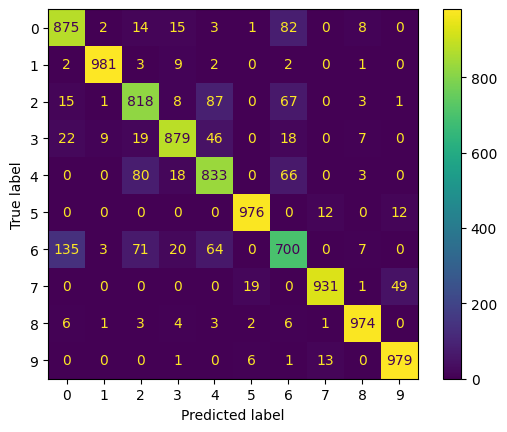

In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Dense(256, activation='relu', name='hiden_one'),
    keras.layers.Dense(128, activation='relu', name='hiden_two'),
    keras.layers.Dense(64, activation='tanh', name='hiden_three'),
    keras.layers.Dense(64, activation='relu', name='hiden_four'),
    keras.layers.Dense(10, name='output')
])
config = model.get_config()
model.save_weights('fashion_weights.h5')

model = model.from_config(config)
model.load_weights('fashion_weights.h5')

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(train_images, train_labels, batch_size = 250, epochs=25, verbose=0)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

  # Получим предсказания
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
y_pred = np.argmax(predictions, axis=1)

# Посмотрим на результаты
ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)

In [4]:
def recall_precision(y_true, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
  precision = precision_score(y_true, y_pred, labels=labels, average=None)
  recall = recall_score(y_true, y_pred, labels=labels, average=None)
  for i, el in enumerate(zip(precision, recall)):
    print(f'Класс - {i}, точность - {el[0]:.3f}, полнота - {el[1]:.3f}')

recall_precision(test_labels, y_pred)

Класс - 0, точность - 0.829, полнота - 0.875
Класс - 1, точность - 0.984, полнота - 0.981
Класс - 2, точность - 0.812, полнота - 0.818
Класс - 3, точность - 0.921, полнота - 0.879
Класс - 4, точность - 0.803, полнота - 0.833
Класс - 5, точность - 0.972, полнота - 0.976
Класс - 6, точность - 0.743, полнота - 0.700
Класс - 7, точность - 0.973, полнота - 0.931
Класс - 8, точность - 0.970, полнота - 0.974
Класс - 9, точность - 0.940, полнота - 0.979


После перебора всех параметров нейросети, созданной на уроке можно уверенно заключить:

Улучшить ее работу только изменяя параметры невозможно.

Не улучшает ситуацию последовательное обучение с использованием различных входных пакетов.

Не удалось также создать сеть с другим количеством слоёв существенно превосходящую образец.

Не оправдала себя идея использовать для обучения зеркально (горизонтально или вертикально) отраженные изображения.

- Bариант давший небольшие улучшения это использование комбинации 2х сетей, сети образца и сети с параметрами, которая "заточена" максимально хорошо предсказывать самый плохо определяемый класс.

313/313 - 1s - loss: 0.3450 - accuracy: 0.8946 - 636ms/epoch - 2ms/step

Test accuracy: 0.894599974155426
313/313 [==============================] - 1s 2ms/step
313/313 - 1s - loss: 0.3435 - accuracy: 0.8893 - 734ms/epoch - 2ms/step

Test accuracy: 0.8892999887466431
313/313 [==============================] - 1s 2ms/step
0.9014
Класс - 0, точность - 0.860, полнота - 0.851
Класс - 1, точность - 0.988, полнота - 0.982
Класс - 2, точность - 0.831, полнота - 0.821
Класс - 3, точность - 0.905, полнота - 0.910
Класс - 4, точность - 0.852, полнота - 0.811
Класс - 5, точность - 0.976, полнота - 0.977
Класс - 6, точность - 0.716, полнота - 0.765
Класс - 7, точность - 0.954, полнота - 0.962
Класс - 8, точность - 0.976, полнота - 0.973
Класс - 9, точность - 0.965, полнота - 0.962
None


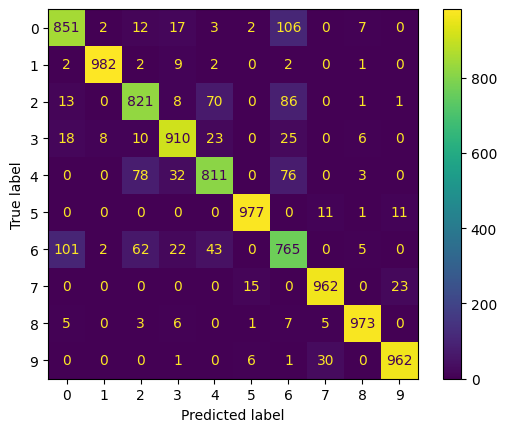

In [5]:
# Создаем словарь который будет содержать модель сети и параметры для обучения
models = dict()
models[0] = [keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Dense(256, activation='relu', name='hiden_one'),
    keras.layers.Dense(128, activation='relu', name='hiden_two'),
    keras.layers.Dense(64, activation='tanh', name='hiden_three'),
    keras.layers.Dense(64, activation='relu', name='hiden_four'),
    keras.layers.Dense(10, name='output')
]), tf.keras.optimizers.Adam(learning_rate=0.001), 250]
models[1] = [keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Dense(256, activation='relu', name='hiden_one'),
    keras.layers.Dense(128, activation='gelu', name='hiden_two'),
    keras.layers.Dense(64, activation='sigmoid', name='hiden_three'),
    keras.layers.Dense(64, activation='selu', name='hiden_four'),
    keras.layers.Dense(10, name='output')]), tf.keras.optimizers.AdamW(learning_rate=0.001), 450]
# Список для сохранения результатов
result = list()
# Формируем сеть.
for key, param in models.items():
# Загружаем параметры
  model, opt, batch = param[0], param[1], param[2]
# Загружаем входные веса, чтобы хоть как-то "уравнять" результаты работы
  model.load_weights('fashion_weights.h5')
  model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  model.fit(train_images, train_labels, batch_size=batch, epochs=25, verbose=0)
# Получаем предварительную метрику
  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  print('\nTest accuracy:', test_acc)
  probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
# Сохраняем массив с вероятностями
  result.append(probability_model.predict(test_images))
# Получаем финишное предсказание суммируя два массива с вероятностями
y_pred = np.argmax(sum(result), axis=1)
# Окончательная метрика качества
print(accuracy_score(test_labels, y_pred))
# Распределение предсказаний по классам
print(recall_precision(test_labels, y_pred))
ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)

Возможно интересным является модуль Keras-tuner для подбора оптимальных параметорв сети, оптимального числа слоев. С которым еще предстоит разбираться.

In [7]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=10, max_value=256, step=25)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
tuner.search(train_images, train_labels, epochs=25, validation_split=0.2, callbacks=[stop_early])
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(f' layer is {best_hps.get("units")}')